# Named Entity Recognition for Spanish

In this Notebook we show you 2 differents ways for recognizing entities.


In [ ]:
!pip3 install -r requirements.txt

# Pretrained transformer

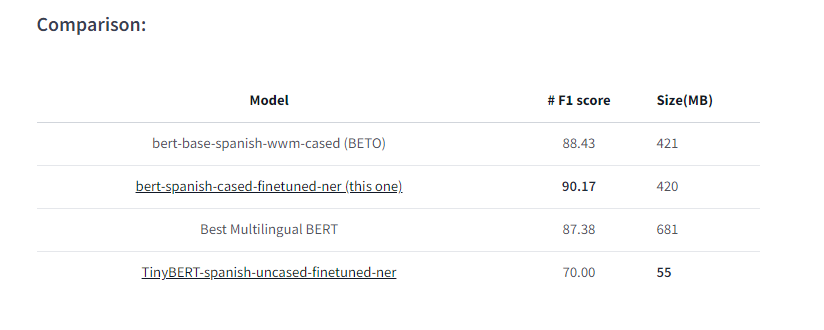

In [10]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
#Mejor modelo entrenado con CONLL Corpora ES
tokenizer = AutoTokenizer.from_pretrained("mrm8488/bert-spanish-cased-finetuned-ner")

model = AutoModelForTokenClassification.from_pretrained("mrm8488/bert-spanish-cased-finetuned-ner")

In [11]:
inputs = [
'La formacion en estas tematicas y un apoyo familiar importante ya que muchas mujeres no participan mas en estas instancias de liderazgo porque tienen una carga de trabajo y en sus hogares',    
"acerca de la mujer como foco	Promover investigacion exclusiva para y sobre mujeres",
"Dar cuotas especiales para concursos academicos y becas Asegurar cuotas equitativas para proyectos como Fondecyt"
]
inputs = tokenizer(inputs, padding=True, truncation=True, return_tensors="pt")

outputs = model(**inputs)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [ ]:
print(outputs.logits.shape)

torch.Size([3, 36, 9])


In [ ]:
model.config.id2label

{0: 'B-LOC',
 1: 'B-MISC',
 2: 'B-ORG',
 3: 'B-PER',
 4: 'I-LOC',
 5: 'I-MISC',
 6: 'I-ORG',
 7: 'I-PER',
 8: 'O'}

In [9]:
import torch
from transformers import AutoModelForTokenClassification, AutoTokenizer

id2label = {
    "0": "B-LOC",
    "1": "B-MISC",
    "2": "B-ORG",
    "3": "B-PER",
    "4": "I-LOC",
    "5": "I-MISC",
    "6": "I-ORG",
    "7": "I-PER",
    "8": "O"
}

tokenizer = AutoTokenizer.from_pretrained('mrm8488/bert-spanish-cased-finetuned-ner')
model = AutoModelForTokenClassification.from_pretrained('mrm8488/bert-spanish-cased-finetuned-ner')
text ="Dar cuotas especiales para concursos academicos y becas asegurar cuotas equitativas para proyectos como Fondecyt"
input_ids = torch.tensor(tokenizer.encode(text)).unsqueeze(0)

outputs = model(input_ids)
last_hidden_states = outputs[0]

for m in last_hidden_states:
  for index, n in enumerate(m):
    if(index > 0 and index <= len(text.split(" "))):
      print(text.split(" ")[index-1] + ": " + id2label[str(torch.argmax(n).item())])
      

Downloading:   0%|          | 0.00/136 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/829 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/237k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/419M [00:00<?, ?B/s]

Dar: O
cuotas: O
especiales: O
para: O
concursos: O
academicos: O
y: O
becas: O
asegurar: O
cuotas: O
equitativas: O
para: O
proyectos: O
como: O
Fondecyt: O


# Using the data_cleaning script

In [3]:
!python -m spacy download en_core_web_sm
import data_cleaning.spanish as sp

     |████████████████████████████████| 13.6 MB 9.1 MB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


2022-02-28 10:12:56 INFO: Downloading default packages for language: es (Spanish)...


2022-02-28 10:13:08 INFO: Finished downloading models and saved to /root/stanza_resources.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
import pandas as pd

df = pd.read_csv('palabras_chilenas.csv')
df

,Unnamed: 0,palabras,freq
0,0,boris,31939
1,1,type,25937
2,2,home,23839
3,3,adr,23767
4,4,kast,23765
...,...,...,...
42768,42768,𝚜𝚘𝚢,1
42769,42769,𝚝𝚘𝚍𝚘,1
42770,42770,𝚝𝚘𝚝𝚊𝚕,1
42771,42771,𝚞𝚗,1


In [6]:
cleaned_doc_train,entities = sp.corpus(dataset=df.palabras.tolist()[0:100])
X_train_preprocessed = [" ".join(words_list) for words_list in cleaned_doc_train]

100%|██████████| 100/100 [00:33<00:00,  2.99it/s]


In [7]:
entities

[[('boris', 'PER')],
 [('home', 'MISC')],
 [('adr', 'PER')],
 [('work', 'MISC')],
 [('net', 'MISC')],
 [('gabriel', 'PER')],
 [('spammer', 'PER')],
 [('douglaskjkjkjk', 'MISC')],
 [('vcard', 'MISC')],
 [('twitter', 'MISC')],
 [('hrs', 'PER')],
 [('tod', 'ORG')],
 [('vota', 'LOC')],
 [('facebook', 'MISC')],
 [('begin', 'PER')],
 [('jak', 'MISC')],
 [('email', 'LOC')],
 [('sii', 'LOC')],
 [('label', 'MISC')],
 [('michel', 'PER')],
 [('sebastian', 'PER')],
 [('pc', 'MISC')],
 [('locomocion', 'MISC')],
 [('paula', 'MISC')],
 [('marcela', 'PER')],
 [('av', 'ORG')],
 [('daniela', 'LOC')],
 [('maipu', 'MISC')],
 [('coquimbo', 'LOC')],
 [('balcones', 'LOC')],
 [('live', 'ORG')],
 [('wea', 'ORG')],
 [('condes', 'MISC')],
 [('bachelet', 'PER')],
 [('dc', 'LOC')]]

In [14]:
inputs = [
'La formacion en estas tematicas y un apoyo familiar importante ya que muchas mujeres no participan mas en estas instancias de liderazgo porque tienen una carga de trabajo y en sus hogares',    
"acerca de la mujer como foco	Promover investigacion exclusiva para y sobre mujeres",
"Dar cuotas especiales para concursos academicos y becas Asegurar cuotas equitativas para proyectos como Fondecyt"
]

In [15]:
cleaned_doc_train,entities = sp.corpus (dataset=inputs, normalize=False, accent = False)
X_train_preprocessed = [" ".join(words_list) for words_list in cleaned_doc_train]

100%|██████████| 3/3 [00:01<00:00,  2.86it/s]


In [16]:
entities

[[('Promover investigacion', 'MISC')],
 [('Asegurar', 'MISC'), ('Fondecyt', 'PER')]]

# Cons

NER task requieres a very specific labeled dataset. It is better to use a trained transformer from hugging face.